In [53]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [61]:
#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos 17 de septiembre 2022.xlsx',sheet_name='Lenga')


In [77]:
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()


In [78]:
#genera filas para cada minuto del rango de datos
r = pd.date_range(start=df_g.index.min(),end=df_g.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
df_g=df_g.reindex(r).fillna(0.0)

#entrega el nuevo tamaño del archivo (filas, columnas)
#df_g.to_excel('tormento.xlsx')

In [79]:
# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()

print(np.round(df_60min.max(),3))
print(np.round(df_30min.max(),3))
print(np.round(df_15min.max(),3))
print(np.round(df_10min.max(),3))
print(np.round(df_5min.max(),3))

PP    1.2
dtype: float64
PP    0.6
dtype: float64
PP    0.4
dtype: float64
PP    0.2
dtype: float64
PP    0.2
dtype: float64


In [80]:
#Intesidad maxima

df_5min0 = (df_g.resample('5T').sum())/5
df_10min0 = (df_g.resample('10T').sum())/10
df_15min0 = (df_g.resample('15T').sum())/15
df_30min0 = (df_g.resample('30T' ).sum())/30
df_60min0 = (df_g.resample('60T').sum())/60


print(np.round(df_60min0.max(),3))
print(np.round(df_30min0.max(),3))
print(np.round(df_15min0.max(),3))
print(np.round(df_10min0.max(),3))
print(np.round(df_5min0.max(),3))

PP    0.02
dtype: float64
PP    0.02
dtype: float64
PP    0.027
dtype: float64
PP    0.02
dtype: float64
PP    0.04
dtype: float64


In [65]:
# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()

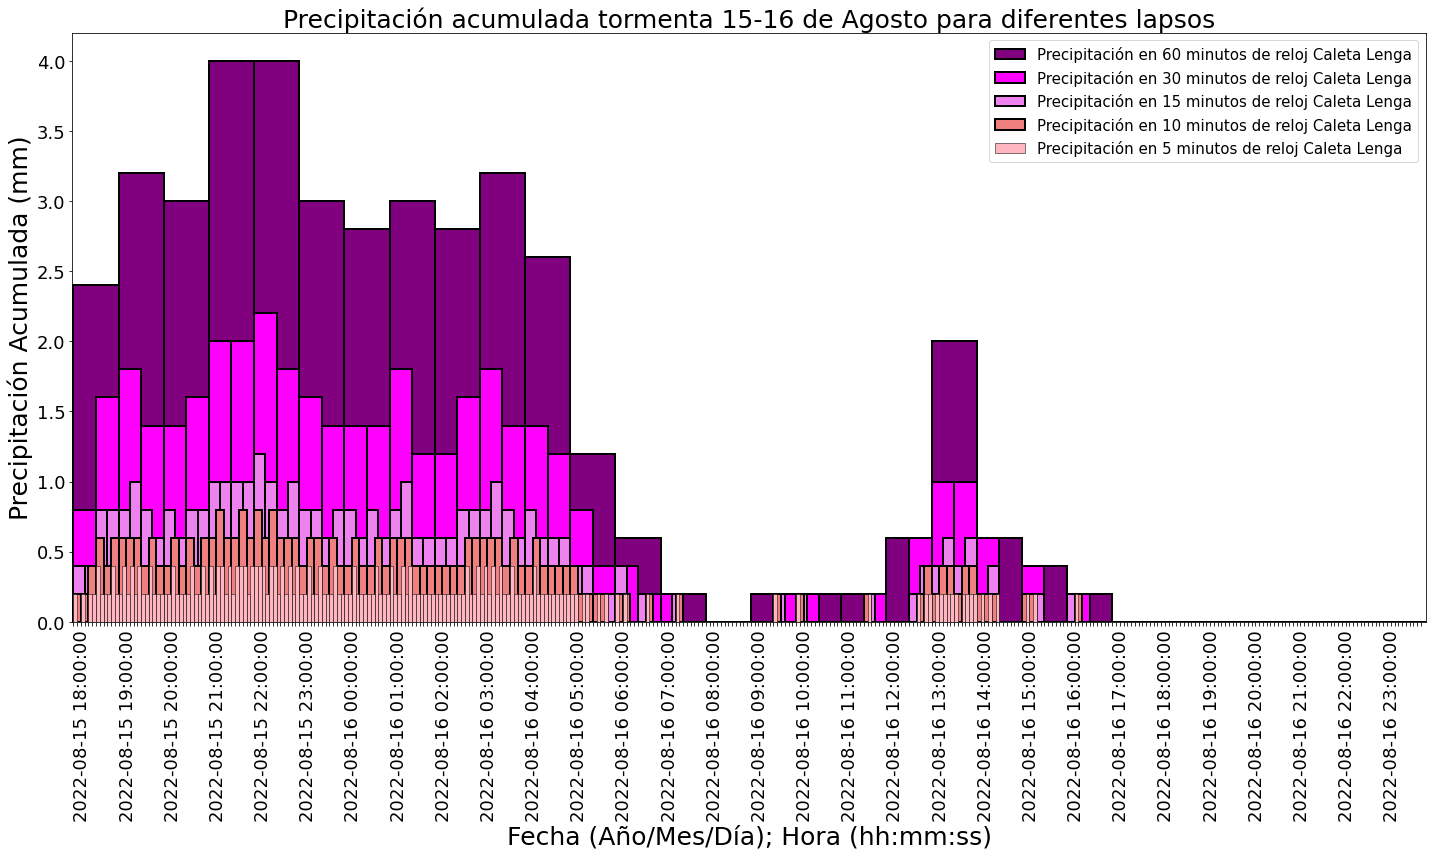

In [59]:
#GRÁFICA
#Deja en la misma escala todos los registros
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)
# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]

fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 1)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Precipitación en 60 minutos de reloj Caleta Lenga","Precipitación en 30 minutos de reloj Caleta Lenga", "Precipitación en 15 minutos de reloj Caleta Lenga","Precipitación en 10 minutos de reloj Caleta Lenga", "Precipitación en 5 minutos de reloj Caleta Lenga"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=25)
ax.set_ylabel('Precipitación Acumulada (mm)', fontsize=25)
ax.set_title('Precipitación acumulada tormenta 15-16 de Agosto para diferentes lapsos', fontsize=25)

ax.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.savefig('ventana fija 15-16 de agosto 2022 Caleta Lenga.png',dpi=900, transparent = False)

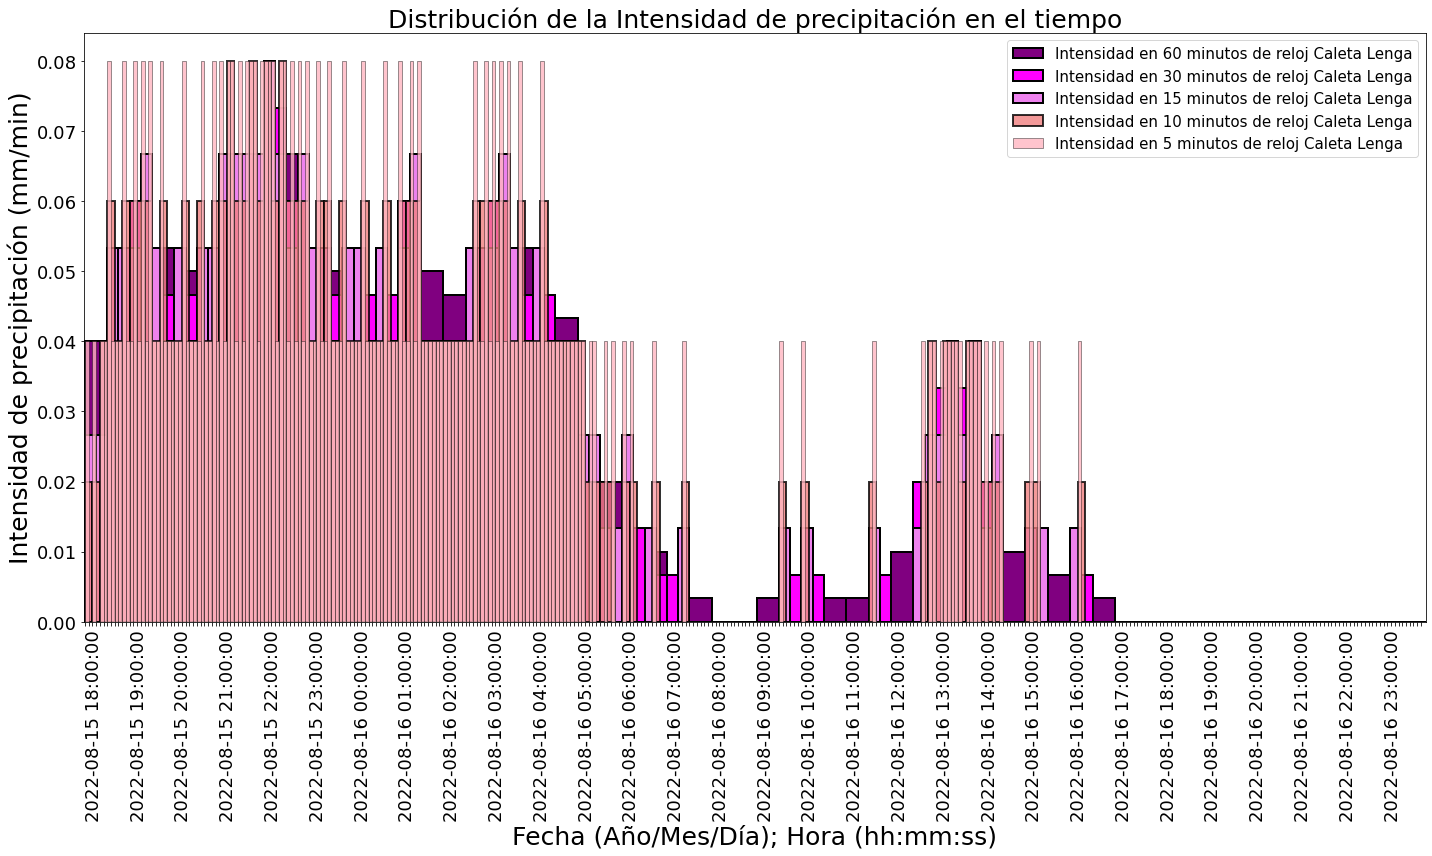

In [60]:
#GRÁFICA
#Deja en la misma escala todos los registros


df_5min = df_g.resample('5T').sum()/5
df_10min = df_g.resample('10T').sum()/10
df_15min = df_g.resample('15T').sum()/15
df_30min = df_g.resample('30T' ).sum()/30
df_60min = df_g.resample('60T').sum()/60
df_10min0 = df_10min.reindex(df_5min.index)
df_15min0 = df_15min.reindex(df_5min.index)
df_30min0 = df_30min.reindex(df_5min.index)
df_60min0 = df_60min.reindex(df_5min.index)

# Modifica las etiquetas del eje x para mostrar solo cada 60 minutos la fecha y hora
etiquetas_x = [df_5min.index[i] if i % 12 == 0 else "" for i in range(len(df_5min.index))]
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
df_60min0.plot.bar(ax=ax, color='purple', width=12, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_30min0.plot.bar(ax=ax, color='magenta', width=6, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_15min0.plot.bar(ax=ax, color='violet', width=3, edgecolor='k',linewidth=2, align='edge',alpha = 1)
df_10min0.plot.bar(ax=ax, color='lightcoral', width=2, edgecolor='k',linewidth=2, align='edge',alpha = 0.8)
df_5min.plot.bar(ax=ax, color='lightpink', width=1, edgecolor='k',linewidth=0.5, align='edge',alpha = 0.8)
ax.set_xticklabels(etiquetas_x, rotation=90, ha='left')
plt.legend(["Intensidad en 60 minutos de reloj Caleta Lenga","Intensidad en 30 minutos de reloj Caleta Lenga", "Intensidad en 15 minutos de reloj Caleta Lenga", "Intensidad en 10 minutos de reloj Caleta Lenga","Intensidad en 5 minutos de reloj Caleta Lenga"], prop={'size': 15})
ax.set_xlabel('Fecha (Año/Mes/Día); Hora (hh:mm:ss)', fontsize=25)
ax.set_ylabel('Intensidad de precipitación (mm/min)', fontsize=25)
ax.set_title('Distribución de la Intensidad de precipitación en el tiempo', fontsize=25)
ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.savefig('ventana fija intensidad 15-16 de Agosto 2022 Caleta Lenga.png',dpi=900, transparent = False)